# Project 2– Resume Classification

**Business objective**- The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In [2]:
final_data=pd.read_csv("/content/final_resumes_dataset.csv")

In [3]:
final_data.head()

,File Name,Text Data,class
0,Anil kumar.docx,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,workday_resumes
1,AradhanaTripathi[4_0].docx,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,workday_resumes
2,Buddha Vamsi.docx,BUDDHA VAMSI ...,workday_resumes
3,kamballapradeep.docx,KAMBALLA PRADEEP ...,workday_resumes
4,Neeraj Mishra.docx,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,workday_resumes


In [4]:
final_data =final_data.drop("File Name", axis=1)

In [5]:
final_data

,Text Data,class
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,workday_resumes
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,workday_resumes
2,BUDDHA VAMSI ...,workday_resumes
3,KAMBALLA PRADEEP ...,workday_resumes
4,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,workday_resumes
...,...,...
65,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,react_resumes
66,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,react_resumes
67,b'\xd0\xcf\x11\xe0\xa1\xb1\x1a\xe1\x00\x00\x00...,react_resumes
68,b'\xd0\xcf\x11\xe0\xa1\xb1\x1a\xe1\x00\x00\x00...,react_resumes


In [6]:
final_data["class"].value_counts()

react_resumes      22
peoplesoft         20
workday_resumes    14
SQL_Developer      14
Name: class, dtype: int64

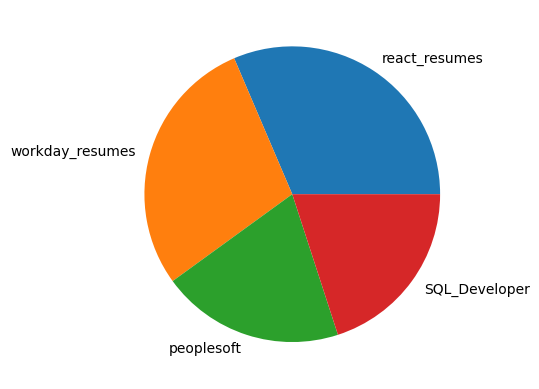

In [7]:
mylabels=['react_resumes','workday_resumes','peoplesoft','SQL_Developer']
plt.pie(final_data["class"].value_counts(),labels = mylabels)
plt.show()

In [8]:
import re
import string
import nltk
from nltk.corpus import stopwords

In [9]:
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def clean_resume_text(resume_text):
    """
    This function takes in a string of text (resume) as input and returns a cleaned version of the text.
    """
    # Convert to lowercase
    resume_text = resume_text.lower()
    
    # Remove numbers and special characters
    resume_text = re.sub('[^a-zA-Z]', ' ', resume_text)
    
    # Remove punctuation
    resume_text = resume_text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra whitespaces
    resume_text = ' '.join(resume_text.split())
    
    #removing word with 2 or 1 letter
    resume_text = ' '.join(word for word in resume_text.split() if len(word) > 2)
    
    # Remove stop words
    resume_text = ' '.join(word for word in resume_text.split() if word not in stopwords)
    
    return resume_text

In [11]:
final_data["clean_text"] = final_data["Text Data"].apply(clean_resume_text)

In [12]:
final_data.head()

,Text Data,class,clean_text
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,workday_resumes,anil kumar maddukuri sql msbi developer summar...
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,workday_resumes,aradhana tripathi current location gachibowli ...
2,BUDDHA VAMSI ...,workday_resumes,buddha vamsi career objective years experience...
3,KAMBALLA PRADEEP ...,workday_resumes,kamballa pradeep synopsis looking forward aspi...
4,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,workday_resumes,resume name neeraj mishra experience summary y...


In [13]:
#Now we will try to find the most common word present in dataset column clean_text

In [14]:
import string

In [15]:
from collections import Counter

In [16]:
all_resume_text = ' '.join(final_data["clean_text"])

In [17]:
all_resume_text

'anil kumar maddukuri sql msbi developer summary years experience sql server ssms creating ssis packages ssrs reports using microsoft business intelligence msbi tools expertise various types joins sub queries writing complex queries involving multiple tables handled data manipulation data consistency creating views triggers synonyms hands experience creation optimization debugging stored procedure functions familiar writing queries using cte temporary tables table variables good experience using set operators like union union except intersect assist required data experience manipulate data multiple table report client using aggregate functions windows functions string functions worked extensively data extraction transformation loading etl process sql server integration services used containers loop container sequence container load data multiple source file database tables expertise using tasks like data flow task execute sql task control flow task execute package task execute process 

In [18]:
all_words = all_resume_text.split()

In [19]:
word_counts = Counter(all_words)

In [20]:
top_words = word_counts.most_common(40)

In [21]:
# Print the result
print("The top 40 most common words are:")
for word, count in top_words:
    print("{}: {}".format(word, count))

The top 40 most common words are:
xff: 41690
xfe: 4989
xbe: 3138
xef: 2966
xbf: 2659
xcf: 2541
xaf: 2464
xcd: 2385
xdf: 2381
xdc: 2378
xfc: 2368
xae: 2368
xdb: 2348
xeb: 2322
xfd: 2309
xde: 2305
xbb: 2295
xed: 2273
xfb: 2266
xcb: 2252
xec: 2219
xaa: 2201
xce: 2181
xca: 2180
xdd: 2176
xac: 2137
xee: 2117
xfa: 2109
xbd: 2109
xba: 2102
xcc: 2045
xad: 2009
xbc: 2002
xea: 1981
xda: 1980
xab: 1977
xfeoj: 1976
sql: 480
xffcj: 477
server: 462


In [22]:
#we will remove these word are not relevent are noise in the dataset and these are most frequent

In [23]:
# Clean the text by removing short words and noise words
noise_words = ['xff','xffcj', 'xbabp','xddn','xaek','xcdf','xedv','xfe', 'xfeoj', 'xbe', 'xed', 'xbf', 'xef', "xcf","xfe",'xfd', 'xea', 'xdd', 'xde', 'xba', 'xdc', 'xae', 'xdf', 'xec', 'xeb', 'xbb', 'xca', 'xaf', 'xac', 'xaa', 'xcf', 'xda', 'xcd', 'xab', 'xfb', 'xce',
                   'xbd', 'xdb', 'xcc', 'xbc', 'xfc', 'xfa', 'xee', 'xad', 'xcb','hxai','xban']


In [24]:
final_data.head()

,Text Data,class,clean_text
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,workday_resumes,anil kumar maddukuri sql msbi developer summar...
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,workday_resumes,aradhana tripathi current location gachibowli ...
2,BUDDHA VAMSI ...,workday_resumes,buddha vamsi career objective years experience...
3,KAMBALLA PRADEEP ...,workday_resumes,kamballa pradeep synopsis looking forward aspi...
4,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,workday_resumes,resume name neeraj mishra experience summary y...


In [25]:
final_data['clean_text'] = final_data['clean_text'].apply(lambda x: re.sub(r'\b\w{{1,2}}\b|\b(?:{})\b'.format('|'.join(noise_words)), '', x))

In [26]:
final_data.head()

,Text Data,class,clean_text
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,workday_resumes,anil kumar maddukuri sql msbi developer summar...
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,workday_resumes,aradhana tripathi current location gachibowli ...
2,BUDDHA VAMSI ...,workday_resumes,buddha vamsi career objective years experience...
3,KAMBALLA PRADEEP ...,workday_resumes,kamballa pradeep synopsis looking forward aspi...
4,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,workday_resumes,resume name neeraj mishra experience summary y...


In [27]:
#Again we will try to see top most frequent word

In [28]:
all_resume_text = ' '.join(final_data["clean_text"])

In [29]:
all_words = all_resume_text.split()

In [30]:
word_counts = Counter(all_words)

In [31]:
top_words = word_counts.most_common(50)

In [32]:
# Print the result
print("The top 40 most common words are:")
for word, count in top_words:
    print("{}: {}".format(word, count))

The top 40 most common words are:
sql: 480
server: 462
experience: 411
peoplesoft: 407
application: 405
data: 352
using: 325
database: 277
theme: 267
project: 232
accent: 228
reports: 209
web: 201
tools: 177
knowledge: 165
developer: 164
process: 159
development: 159
servers: 154
like: 146
react: 146
oracle: 145
xml: 145
services: 143
hel: 136
people: 134
business: 132
system: 132
functions: 128
creating: 127
client: 126
rels: 123
skills: 121
design: 121
team: 119
various: 116
rexperience: 116
technical: 113
working: 111
domains: 110
queries: 109
scheduler: 106
windows: 105
date: 105
environment: 105
applications: 104
tables: 101
management: 98
involved: 97
support: 97


In [33]:
final_data

,Text Data,class,clean_text
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,workday_resumes,anil kumar maddukuri sql msbi developer summar...
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,workday_resumes,aradhana tripathi current location gachibowli ...
2,BUDDHA VAMSI ...,workday_resumes,buddha vamsi career objective years experience...
3,KAMBALLA PRADEEP ...,workday_resumes,kamballa pradeep synopsis looking forward aspi...
4,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,workday_resumes,resume name neeraj mishra experience summary y...
...,...,...,...
65,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,react_resumes,ranga gaganam professional summary professiona...
66,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,react_resumes,shaik abdul sharuk years experience wipro care...
67,b'\xd0\xcf\x11\xe0\xa1\xb1\x1a\xe1\x00\x00\x00...,react_resumes,...
68,b'\xd0\xcf\x11\xe0\xa1\xb1\x1a\xe1\x00\x00\x00...,react_resumes,...


# Visualization

In [34]:
import matplotlib.pyplot as plt

In [35]:
import seaborn as sns

In [36]:
top_words = dict(word_counts.most_common(10))

In [37]:
# create a dataframe from the dictionary
df_top_words = pd.DataFrame(list(top_words.items()), columns=['Word', 'Frequency'])


In [38]:
import seaborn as sns

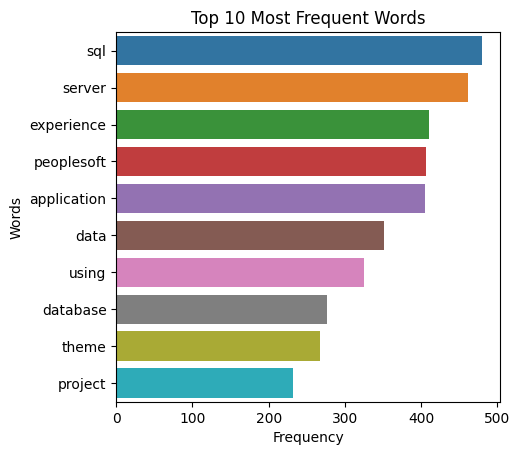

In [39]:
# create the bar plot
sns.barplot(x='Frequency', y='Word', data=df_top_words)

# set the title and axis labels
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')

# adjust the gap between bars
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("whitegrid")
plt.subplots_adjust(left=0.3)
plt.show()

In [40]:
#creating the wordcloud

In [41]:
from wordcloud import WordCloud

In [42]:
#using all combined text--> all_resume_text

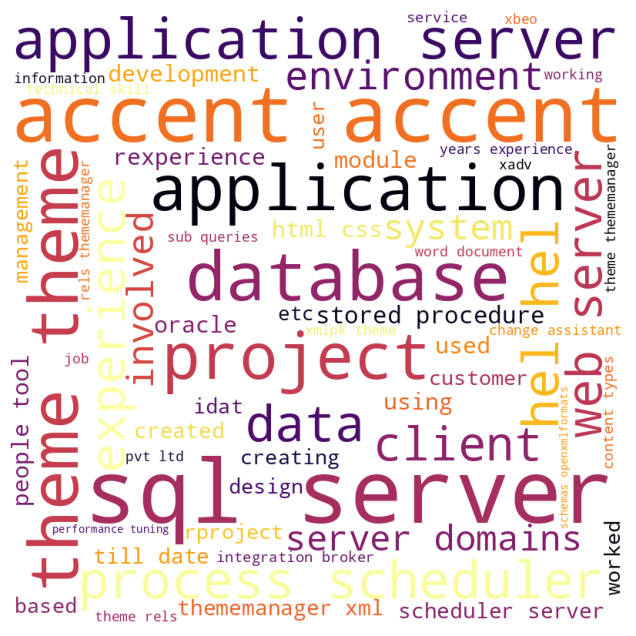

In [43]:
# Generate wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='inferno', max_words=60).generate(all_resume_text)

# Visualize the wordcloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [44]:
#trying to visualise each resume lengh of word and uniuqe word into it

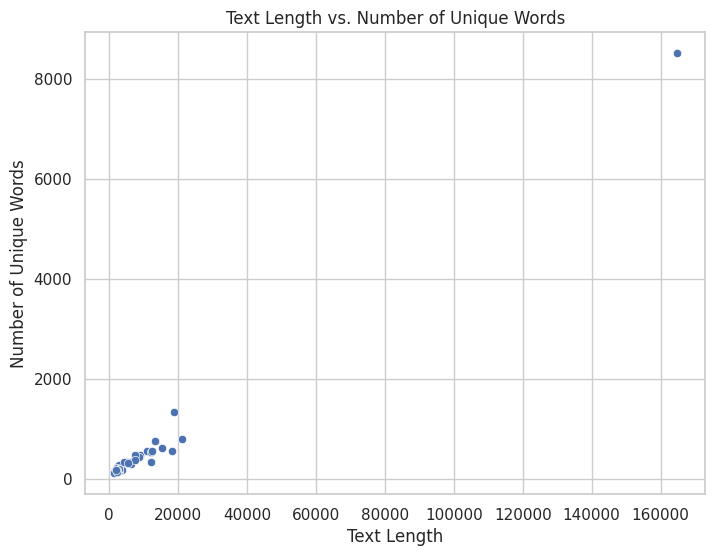

In [45]:
# Create scatter plot of the length of each text entry vs the number of unique words in that entry
final_data['text_length'] = final_data['clean_text'].apply(len)
final_data['unique_words'] = final_data['clean_text'].apply(lambda x: len(set(str(x).split())))

plt.figure(figsize=(8, 6))
sns.scatterplot(x='text_length', y='unique_words', data=final_data)
plt.title('Text Length vs. Number of Unique Words')
plt.xlabel('Text Length')
plt.ylabel('Number of Unique Words')
plt.show()

# Model Building

In [46]:
final_data

,Text Data,class,clean_text,text_length,unique_words
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,workday_resumes,anil kumar maddukuri sql msbi developer summar...,3600,266
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,workday_resumes,aradhana tripathi current location gachibowli ...,4177,295
2,BUDDHA VAMSI ...,workday_resumes,buddha vamsi career objective years experience...,2367,228
3,KAMBALLA PRADEEP ...,workday_resumes,kamballa pradeep synopsis looking forward aspi...,3747,260
4,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,workday_resumes,resume name neeraj mishra experience summary y...,3410,240
...,...,...,...,...,...
65,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,react_resumes,ranga gaganam professional summary professiona...,2206,144
66,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,react_resumes,shaik abdul sharuk years experience wipro care...,2104,179
67,b'\xd0\xcf\x11\xe0\xa1\xb1\x1a\xe1\x00\x00\x00...,react_resumes,...,164809,8511
68,b'\xd0\xcf\x11\xe0\xa1\xb1\x1a\xe1\x00\x00\x00...,react_resumes,...,5505,326


In [47]:
(final_data.iloc[67]['clean_text'])

'                                                                                                                                                                                                                                                                                                                                                                                                                     bjbjb                                  xbax                                                                           shape mergeformat cprofile rsearching opportunity bring years experience software developing technology engineering designing maintenance cater specific needs people critical thinking problem solving leadership ecore skills programming languages java javascript mysql spring boot rreact angular css bootstrap html cpersonal details rbirth date apr rnationality rindian raddress node microservices rwork experience software engineer rbraino services new delhi mongodb aws azure

## One hot Encoding

In [48]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
final_data["class_enc"] = ord_enc.fit_transform(final_data[["class"]])
final_data[["clean_text","text_length","unique_words","class", "class_enc"]].head(31)

,clean_text,text_length,unique_words,class,class_enc
0,anil kumar maddukuri sql msbi developer summar...,3600,266,workday_resumes,3.0
1,aradhana tripathi current location gachibowli ...,4177,295,workday_resumes,3.0
2,buddha vamsi career objective years experience...,2367,228,workday_resumes,3.0
3,kamballa pradeep synopsis looking forward aspi...,3747,260,workday_resumes,3.0
4,resume name neeraj mishra experience summary y...,3410,240,workday_resumes,3.0
5,sql developer name bandi prem sai career objec...,3376,212,workday_resumes,3.0
6,sql server developer syam kumar professional s...,2732,229,workday_resumes,3.0
7,raju pavana kumari professional summary years ...,3087,247,workday_resumes,3.0
8,resume ramalakshmi career objective profession...,3218,281,workday_resumes,3.0
9,name ramesh career objective contribute organi...,5235,338,workday_resumes,3.0


## Vectorizing docs

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1,2), stop_words='english')
features = tfidf.fit_transform(final_data.clean_text).toarray()
labels = final_data.class_enc
features.shape

(70, 1713)

In [50]:
features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08979152, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06746103, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.0202573 ,
        0.02070288],
       [0.        , 0.        , 0.        , ..., 0.        , 0.03747709,
        0.03830143],
       [0.        , 0.        , 0.        , ..., 0.        , 0.0279864 ,
        0.02860199]])

In [51]:
final_data.rename(columns={"class":"classes"},inplace=True)

## Using chi2 to see correlated items:

In [52]:
# Create a new column 'category_id' with encoded categories 
#final_data['class_enc'] = final_data['classes'].factorize()[0]
category_id_df = final_data[['classes', 'class_enc']].drop_duplicates()

# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['class_enc', 'classes']].values)
# New dataframe
final_data.head(57)

,Text Data,classes,clean_text,text_length,unique_words,class_enc
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,workday_resumes,anil kumar maddukuri sql msbi developer summar...,3600,266,3.0
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,workday_resumes,aradhana tripathi current location gachibowli ...,4177,295,3.0
2,BUDDHA VAMSI ...,workday_resumes,buddha vamsi career objective years experience...,2367,228,3.0
3,KAMBALLA PRADEEP ...,workday_resumes,kamballa pradeep synopsis looking forward aspi...,3747,260,3.0
4,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,workday_resumes,resume name neeraj mishra experience summary y...,3410,240,3.0
5,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,workday_resumes,sql developer name bandi prem sai career objec...,3376,212,3.0
6,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,workday_resumes,sql server developer syam kumar professional s...,2732,229,3.0
7,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,workday_resumes,raju pavana kumari professional summary years ...,3087,247,3.0
8,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,workday_resumes,resume ramalakshmi career objective profession...,3218,281,3.0
9,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,workday_resumes,name ramesh career objective contribute organi...,5235,338,3.0


**the higher value of the chi^2 score, the more likelihood the feature is correlated with the class, thus it should be selected for model training.**

In [53]:
final_data["class_enc"].unique()

array([3., 0., 1., 2.])

In [54]:
final_data["classes"].unique()

array(['workday_resumes', 'SQL_Developer', 'peoplesoft', 'react_resumes'],
      dtype=object)

workday_resumes= 3

SQL_Developer = 0

peoplesoft = 1

react_resumes = 2

In [55]:
from sklearn.feature_selection import chi2
import numpy as np
N = 4
for classes, class_enc in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == class_enc)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names_out())[indices]
    print(feature_names)
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    
    print("# '{}':".format(classes))
    print("  . Most correlated unigrams:\n\t. {}".format('\n\t. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n\t. {}".format('\n\t. '.join(bigrams[-N:])))
    print("\n\n")

['wireless' 'codes' 'current' ... 'stored procedures' 'procedures'
 'functions']
# 'SQL_Developer':
  . Most correlated unigrams:
	. tables
	. stored
	. procedures
	. functions
  . Most correlated bigrams:
	. sql queries
	. sub queries
	. sql server
	. stored procedures



['web' 'microsoft' 'responsibilities worked' ... 'people tools' 'fscm'
 'peoplesoft']
# 'peoplesoft':
  . Most correlated unigrams:
	. upgrade
	. hcm
	. fscm
	. peoplesoft
  . Most correlated bigrams:
	. application server
	. process scheduler
	. application designer
	. people tools



['portal' 'technical' 'implementing' ... 'javascript' 'html' 'react']
# 'react_resumes':
  . Most correlated unigrams:
	. css
	. javascript
	. html
	. react
  . Most correlated bigrams:
	. react developer
	. using react
	. css javascript
	. html css



['wireless' 'codes' 'current' ... 'stored procedures' 'procedures'
 'functions']
# 'workday_resumes':
  . Most correlated unigrams:
	. tables
	. stored
	. procedures
	. functions
  . Mos

# Multi-Class Classifier: Features and Design

In [56]:
final_data.head(2)

,Text Data,classes,clean_text,text_length,unique_words,class_enc
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,workday_resumes,anil kumar maddukuri sql msbi developer summar...,3600,266,3.0
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,workday_resumes,aradhana tripathi current location gachibowli ...,4177,295,3.0


# Applying naive bayes for classification

In [57]:
final_data.head()

,Text Data,classes,clean_text,text_length,unique_words,class_enc
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,workday_resumes,anil kumar maddukuri sql msbi developer summar...,3600,266,3.0
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,workday_resumes,aradhana tripathi current location gachibowli ...,4177,295,3.0
2,BUDDHA VAMSI ...,workday_resumes,buddha vamsi career objective years experience...,2367,228,3.0
3,KAMBALLA PRADEEP ...,workday_resumes,kamballa pradeep synopsis looking forward aspi...,3747,260,3.0
4,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,workday_resumes,resume name neeraj mishra experience summary y...,3410,240,3.0


In [58]:
def split_into_words(i):
    return (i.split(" "))

In [59]:
from sklearn.model_selection import train_test_split

resume_train,resume_test = train_test_split(final_data,test_size=0.2)

In [60]:
resume_test

,Text Data,classes,clean_text,text_length,unique_words,class_enc
20,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL_Developer,sql server developer syam kumar professional s...,2732,229,0.0
9,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,workday_resumes,name ramesh career objective contribute organi...,5235,338,3.0
53,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",react_resumes,sarala madasu sarala madasu sri geethika prest...,2478,181,2.0
44,b'\xd0\xcf\x11\xe0\xa1\xb1\x1a\xe1\x00\x00\x00...,peoplesoft,...,12290,530,1.0
35,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,peoplesoft,priyabrata hota career objective pursuing peop...,2639,186,1.0
52,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,react_resumes,pragnya pattnaik expertise around years experi...,2295,209,2.0
4,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,workday_resumes,resume name neeraj mishra experience summary y...,3410,240,3.0
64,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,react_resumes,pranish sonone career summary experience years...,1286,111,2.0
46,b'\xd0\xcf\x11\xe0\xa1\xb1\x1a\xe1\x00\x00\x00...,peoplesoft,...,12502,562,1.0
50,KAMALAKAR REDDY. A \n\nLinked In: https://www....,react_resumes,kamalakar reddy linked https www linkedin com ...,2120,191,2.0


In [61]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [62]:
# Preparing resume texts into word count matrix format 
resume_bow = CountVectorizer(analyzer=split_into_words).fit(final_data.clean_text)

In [63]:
# For all resumes
all_resume_matrix = resume_bow.transform(final_data.clean_text)
all_resume_matrix.shape 

(70, 13000)

In [64]:
# For training messages
train_resume_matrix = resume_bow.transform(resume_train.clean_text)
train_resume_matrix.shape # (56, 13000)


(56, 13000)

In [65]:
# For testing messages
test_resume_matrix = resume_bow.transform(resume_test.clean_text)
test_resume_matrix.shape # (14, 13000)

(14, 13000)

# Without TFIDF matrices 

In [66]:
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_resume_matrix,resume_train.classes)
train_pred_m = classifier_mb.predict(train_resume_matrix)
accuracy_train_m = np.mean(train_pred_m==resume_train.classes)
print("accuracy_train_m = ",accuracy_train_m)

test_pred_m = classifier_mb.predict(test_resume_matrix)
accuracy_test_m = np.mean(test_pred_m==resume_test.classes) 

print("accuracy_test_m= ",accuracy_test_m)

accuracy_train_m =  0.5535714285714286
accuracy_test_m=  0.14285714285714285


In [67]:
# Gaussian Naive Bayes 
classifier_gb = GB()
classifier_gb.fit(train_resume_matrix.toarray(),resume_train.classes.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_resume_matrix.toarray())
accuracy_train_g = np.mean(train_pred_g==resume_train.classes) 

accuracy_train_g

0.5892857142857143

In [68]:
test_pred_g = classifier_gb.predict(test_resume_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==resume_test.classes) 

accuracy_test_g

0.35714285714285715

# Using TFIDF

In [69]:
from sklearn.feature_extraction.text import TfidfTransformer

# Learning Term weighting and normalizing on entire emails
tfidf_transformer = TfidfTransformer().fit(all_resume_matrix)

# Preparing TFIDF for train emails
train_tfidf = tfidf_transformer.transform(train_resume_matrix)

train_tfidf.shape # (3891, 6661)

# Preparing TFIDF for test emails
test_tfidf = tfidf_transformer.transform(test_resume_matrix)

test_tfidf.shape #  (1668, 6661)

(14, 13000)

In [70]:
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_tfidf,resume_train.classes)
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m==resume_train.classes) 
accuracy_train_m



0.7142857142857143

In [71]:
test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m==resume_test.classes) 
accuracy_test_m 

0.7142857142857143

In [72]:
# Gaussian Naive Bayes 
classifier_gb = GB()
classifier_gb.fit(train_tfidf.toarray(),resume_train.classes.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_tfidf.toarray())
accuracy_train_g = np.mean(train_pred_g==resume_train.classes) 
accuracy_train_g


# inplace of tfidf we can also use train_emails_matrix and test_emails_matrix instead of term inverse document frequency matrix

0.8214285714285714

In [73]:
test_pred_g = classifier_gb.predict(test_tfidf.toarray())
accuracy_test_g = np.mean(test_pred_g==resume_test.classes) 
accuracy_test_g

0.6428571428571429